In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston

In [2]:
# 住宅価格データセットのダウンロード
#boston = load_boston()
#X = boston.data
#y = boston.target
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = np.ravel(raw_df.values[1::2, 2])

# 特徴量と正解を訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\treme\AppData\Local\Temp\ipykernel_17212\4090491023.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [3]:
# ランダムフォレスト回帰のモデルを作成
# The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'poisson', 'friedman_mse', 'absolute_error'}. Got 'mse' instead.
model = RandomForestRegressor(bootstrap=True, n_estimators=1000, criterion='squared_error', max_depth=None, random_state=0, n_jobs=-1)

# モデルの訓練
model.fit(X_train, y_train)

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'friedman_mse', 'poisson'}. Got 'mse' instead.

In [ ]:
# 訓練データ、テストデータの住宅価格を予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 正解の住宅価格と予測の住宅価格のMSEを計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 1.39, test: 18.81


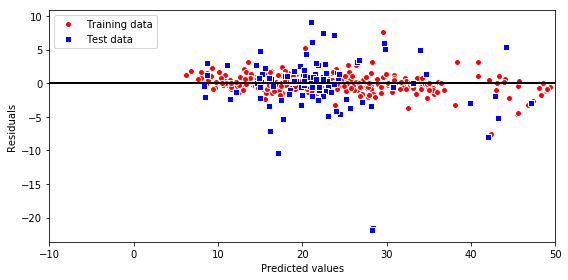

In [ ]:
# 残差プロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [ ]:
# 特徴量重要度を表示
model.feature_importances_

array([0.04127321, 0.0012036 , 0.00759454, 0.0007884 , 0.02050564,
       0.40616279, 0.01350879, 0.03921652, 0.00394729, 0.01548929,
       0.02219559, 0.00957614, 0.4185382 ])

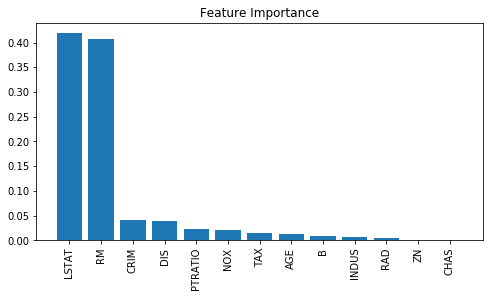

In [ ]:
# 特徴量重要性を計算
importances = model.feature_importances_

# 特徴量重要性を降順にソート
indices = np.argsort(importances)[::-1]

# 特徴量の名前を、ソートした順に並び替え
names = [boston.feature_names[i] for i in indices]

# プロットの作成
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()